<a href="https://colab.research.google.com/github/prajwal-u2/advanced-machine-learning/blob/main/Reinforcement_Learning-Lunar_Lander/Reinforcement_Learning-Lunar_Lander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This assignment consists of 3 sections and each section has multiple exercises (4 exercises in total).

**Assignment Due: December 9th, 2025, 11:59 PM CST.**

**Grace Period (No penalty): 2 days till December 11th, 2025, 11:59 PM CST.**

**No submission will be accepted after December 11th.**

# I. KL-Divergence [15 Points]

[Kullback-Leibler (KL) Divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) is a common measure for comparing two probability distributions. This exercise involves understanding KL divergence and its properties. For two probability distributions $P$ and $Q$ defined on the same probability space $X$:

**1. Discrete Case:**
$$ D_{KL}(P || Q) = \sum_{x \in X} P(x) \log \left( \frac{P(x)}{Q(x)} \right) $$

**2. Continuous Case:**
$$ D_{KL}(P || Q) = \int_{-\infty}^{\infty} p(x) \log \left( \frac{p(x)}{q(x)} \right) dx $$

**Exercise 1)** Which of the following properties are true for KL divergence?

*   A. $D_{KL}(P || Q) \geq 0$ for all valid probability distributions $P, Q$ i.e., KL divergence is always non-negative.
*  B. KL divergence satisfies the Triangle Inequality: $D_{KL}(P || R) \leq D_{KL}(P || Q) + D_{KL}(Q || R)$.
* C. KL divergence is symmetric: $D_{KL} (P || Q) = D_{KL} (Q || P)$
*  D. The divergence is zero if and only if the two distributions are identical: $D_{KL}(P || Q) = 0$ if and only if $P = Q$ almost everywhere.

**Ans: A and D**

The selected options are true because the KL divergense is always positive and it is 0 when both the distributions are identitcal. It is a directed measure of difference and tells how different one distribution is from the other. And it is not a direct measure of distance and hence it will not satidfy the options B and C.

---

**Exercise 2)** In sequential decision making problems with continuous actions (e.g., a humanoid robot), policies are typically modeled as Multivariate Gaussians. Let's assume that the "source/old" policy be $P = N(\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)$ and the "new/target" policy be $Q = N(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1)$. KL divergence for two $k$-dimensional multivariate gaussian distribution $P = N(\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)$ and  $Q = N(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1)$ can be computed in closed form as:
$$ D_{KL}(P || Q) = \frac{1}{2} \left( \underbrace{\text{tr}(\boldsymbol{\Sigma}_1^{-1} \boldsymbol{\Sigma}_0)}_{\text{Trace Term}} + \underbrace{(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_0)^T \boldsymbol{\Sigma}_1^{-1} (\boldsymbol{\mu}_1 - \boldsymbol{\mu}_0)}_{\text{Quadratic Term}} - k + \underbrace{\ln \frac{|\boldsymbol{\Sigma}_1|}{|\boldsymbol{\Sigma}_0|}}_{\text{Log-Det Term}} \right) $$


**Based on the formula above, which of the following statements are TRUE?**

*   A.  If the covariance matrices are identical ($\boldsymbol{\Sigma}_0 = \boldsymbol{\Sigma}_1 = \boldsymbol{\Sigma}$), the trace and log-det terms vanish, leaving only the squared distance between the means normalized by the covariance i.e., $D_{KL} = \frac{1}{2} (\boldsymbol{\mu}_1 - \boldsymbol{\mu}_0)^T \boldsymbol{\Sigma}^{-1} (\boldsymbol{\mu}_1 - \boldsymbol{\mu}_0)$.
*   B.  The quadratic term implies that errors in the mean are penalized **less** in directions where the target distribution $Q$ has **high** variance (high uncertainty). (Hint: consider analyzing a simple 2D diagonal case for quadratic term where $\boldsymbol{\Sigma}_1 = \text{diag}(\sigma_{x}^2, \sigma_{y}^2)$.
*   C. If the means are identical ($\boldsymbol{\mu}_0 = \boldsymbol{\mu}_1$), the quadratic term disappears, and the divergence is determined solely by the difference in the "spread" (trace) and "volume" (determinant) of the distributions i.e., $D_{KL} = \frac{1}{2} (\text{tr}(\boldsymbol{\Sigma}_1^{-1} \boldsymbol{\Sigma}_0) - k + \ln |\boldsymbol{\Sigma}_1| - \ln |\boldsymbol{\Sigma}_0|)$.

**Ans: A, B, C all are True.**

A and C are true as we can see directly from the equations. Option B is also true as variance is in the denominator, and high variance means the result is smaller, and hence less penalty.

----

#II. Implement Proximal Policy Optimization (PPO) for Lunar Lander 2D environment [75 Points]

Lunar Lander is a simplified 2D environment available in Gymnasium library where the goal is to land a spacecraft safely on a landing pad. Please see full details of the MDP for Lunar Lander at this page [Page Link](https://gymnasium.farama.org/environments/box2d/lunar_lander/). Please instantiate your environment with `LunarLander-v3` environment ID and use default values for all the other parameters i.e. following code should suffice to instantiate the environment.

```python
import gymnasium as gym
env = gym.make(env_name = `LunarLander-v3`)
```

You will have to install the gymnasium library and box2d library.

```!pip install gymnasium[box2d] swig```


**Exercise 3: In this exercise, your task is to implement the PPO algorithm for solving this task of Lunar Lander.**

**3.1** Show a visualization plot with x axis as the number of episodes and y axis as the sum of rewards attained in each episode. This plot will be noisy so you should also include a moving average of the reward (for 10 episodes). This plot should clearly show that the average reward is increasing as the number of episodes increases.

**3.2.** Show a visualization plot with x axis as the episode index and y axis as the lenght of each episode.

**3.3.** Show training loss curves for actor (policy) and critic (value function) over number of update steps.

## Details of implementing PPO

1. PPO is an Actor-Critic method. We need two neural networks (or one network with two heads).  
*Policy network:* Takes the state as input and outputs a probability distribution over actions (logits).*Value function network or Critic:* Takes the state as input and estimates the Value function V(s) (scalar). Simple feedforward networks should work well for the LunarLander environment.

2. Generalized Advantage Estimation (GAE) allows us to compute both advantages and targets for value function.

## PPO Psuedocode for illustration

```
initialize actor network π_θ(s)  (outputs action probabilities over action_dim)
initialize critic network V_ϕ(s) (outputs scalar value)
initialize Adam optimizers for θ and ϕ with learning rate lr

initialize empty lists:
    episode_rewards, episode_lengths, actor_losses, critic_losses, entropies

for episode = 1 to total_episodes:

    s ← env.reset()
    done ← False # tells us if an episode ends
    R_ep ← 0           # episode return
    L_ep ← 0           # episode length

    while not done:

        # ----- ACTOR-CRITIC ACTION SELECTION -----
        input_state ← to_tensor(s)
        with no_grad:
            a ~ π_θ(· | input_state)       # sample  action
            logπ_old ← log π_θ(a | s)
            v ← V_ϕ(s)

        # ----- ENV STEP -----
        s', r, terminated, truncated ← env.step(a)
        done ← terminated OR truncated

        # ----- STORE TRANSITION IN DATA BUFFER -----
        append s to states
        append a to actions
        append r to rewards
        append logπ_old to log_probs
        append v to values
        append done to dones

        # update episode stats
        s ← s'
        R_ep ← R_ep + r
        L_ep ← L_ep + 1

    # store episode-level metrics
    append R_ep to episode_rewards
    append L_ep to episode_lengths
    push R_ep into reward_window

    # ----- PERIODIC PPO UPDATE -----
    if episode mod update_frequency == 0:

        
        # === COMPUTE ADVANTAGES AND RETURNS VIA GAE ===
        # given stored: rewards[0:T-1], values[0:T-1], dones[0:T-1]
        advantages ← empty list
        gae ← 0
        values_ext ← values concatenated with [0]  # bootstrap 0

        for t from T-1 down to 0:
            delta_t = rewards[t]
                      + gamma * values_ext[t+1] * (1 - dones[t])
                      - values_ext[t]
            gae = delta_t + gamma * lambda_GAE * (1 - dones[t]) * gae
            prepend gae to advantages

        returns = [ advantages[t] + values[t] for each t ] # targets for value function

        normalize advantages:
            advantages ← (advantages - mean) / (std + 1e-8)

        total_actor_loss ← 0
        total_critic_loss ← 0
        total_entropy ← 0

        for epoch = 1 to n_epochs:

            indices ← random permutation of {0, …, T-1}

            for each mini-batch B of indices of size batch_size:

                s_B ← states[B]
                a_B ← actions[B]
                logπ_old_B ← log_probs[B]
                A_B ← advantages[B]
                R_B ← returns[B]

                # ----- CURRENT POLICY AND VALUE -----
                p_B ← π_θ(· | s_B)          # action probabilities
                dist ← Categorical(p_B)
                logπ_new_B ← log dist(a_B)
                entropy_B ← mean entropy of dist

                v_B ← V_ϕ(s_B)

                # ----- PPO CLIPPED OBJECTIVE -----
                ratio_B = exp(logπ_new_B - logπ_old_B)

                surr1 = ratio_B * A_B
                surr2 = clip(ratio_B, 1 - epsilon_clip, 1 + epsilon_clip) * A_B

                actor_loss_B = - mean( min(surr1, surr2) )
                critic_loss_B = MSE(v_B, R_B)

                total_loss_B = actor_loss_B
                               + value_coef * critic_loss_B
                               - entropy_coef * entropy_B
                # the entropy part `-entropy_coef * entropy_B` of this objective is optional and helps with exploration

                # ----- GRADIENT UPDATE -----
                zero_grad(θ)
                update θ with gradient step on actor_loss

                zero_grad(ϕ)
                update ϕ with gradient step on actor_loss


                # accumulate metrics
                total_actor_loss += actor_loss_B
                total_critic_loss += critic_loss_B
                total_entropy += entropy_B

        # average metrics over all mini-batch updates
        actor_losses.append( mean_actor_loss )
        critic_losses.append( mean_critic_loss )
        entropies.append( mean_entropy )

        # clear rollout buffer: states, actions, rewards, log_probs, values, dones
```

## Common hyperparameters to set in PPO

- total_episodes: Maximum number of training episodes.

- update_frequency: How many episodes to collect before updating policy and critic.


- Learning rate for both actor and critic  optimizers.

- $\gamma$ : Discount factor.

- gae_lambda : trades bias vs variance in advantage estimates.

- clip_epsilon: PPO clipping parameter $\epsilon$.

- value_coef: Weight on the critic (value) loss when combined with actor loss in the total objective.

- entropy_coef: Weight on the optional entropy bonus term; encourages exploration by penalizing very peaked (low-entropy) policies.


# Exercise II

In [ ]:
!pip install swig torch matplotlib gymnasium gymnasium[box2d]

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2399053 sha256=2da9b6b442dd5059a0145f115aab010dea123c7415096a450cc6e86cc6e03404
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [ ]:
# Import Statements

import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

env = gym.make("LunarLander-v3")
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n

In [ ]:
# PPO Parameters Settings

gamma = 0.99
gae_lambda = 0.95
clip_eps = 0.2

actor_lr = 2e-4
critic_lr = 5e-4

total_episodes = 2000
update_frequency = 10
n_epochs = 10
batch_size = 128

value_coef = 0.5
entropy_coef = 0.001


In [ ]:
# Actor and Critic neural network architectures

class Actor(nn.Module):
    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, act_dim)
        )

    def forward(self, x):
        return self.net(x)


class Critic(nn.Module):
    def __init__(self, obs_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x).squeeze(-1)

In [ ]:
# Initialize Actor and Critic models and their optimizers

actor = Actor(obs_dim, act_dim)
critic = Critic(obs_dim)
actor_opt = optim.Adam(actor.parameters(), lr=actor_lr)
critic_opt = optim.Adam(critic.parameters(), lr=critic_lr)

In [ ]:
# RolloutBuffer class to store data

class RolloutBuffer:
    def __init__(self):
        self.states = []
        self.actions = []
        self.rewards = []
        self.dones = []
        self.log_probs = []
        self.values = []

    def clear(self):
        self.__init__()

In [ ]:
# Action selection function using the actor network

import torch.distributions as D

def select_action(state):
    state_t = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        logits = actor(state_t)
        dist = D.Categorical(logits=logits)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        value = critic(state_t)
    return action.item(), log_prob.item(), value.item()

In [ ]:
# Generalized Advantage Estimation (GAE) computation function

def compute_gae(rewards, values, dones, gamma, gae_lambda):

    T = len(rewards)
    advantages = np.zeros(T, dtype=np.float32)
    gae = 0.0

    values_ext = np.append(values, 0.0)

    for t in reversed(range(T)):
        delta = rewards[t] + gamma * values_ext[t+1] * (1 - dones[t]) - values_ext[t]
        gae = delta + gamma * gae_lambda * (1 - dones[t]) * gae
        advantages[t] = gae

    returns = advantages + values
    return advantages, returns

In [ ]:
# PPO update function for training the actor and critic

def ppo_update(buffer, gamma, gae_lambda):
    states = torch.tensor(buffer.states, dtype=torch.float32)
    actions = torch.tensor(buffer.actions, dtype=torch.int64)
    rewards = np.array(buffer.rewards, dtype=np.float32)
    dones = np.array(buffer.dones, dtype=np.float32)
    log_probs_old = torch.tensor(buffer.log_probs, dtype=torch.float32)
    values = np.array(buffer.values, dtype=np.float32)

    advantages, returns = compute_gae(rewards, values, dones, gamma, gae_lambda)
    advantages = torch.tensor(advantages, dtype=torch.float32)
    returns = torch.tensor(returns, dtype=torch.float32)

    advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

    dataset_size = states.shape[0]
    actor_loss_epoch = []
    critic_loss_epoch = []

    for _ in range(n_epochs):
        indices = np.random.permutation(dataset_size)
        for start in range(0, dataset_size, batch_size):
            end = start + batch_size
            batch_idx = indices[start:end]

            s_b = states[batch_idx]
            a_b = actions[batch_idx]
            old_log_b = log_probs_old[batch_idx]
            adv_b = advantages[batch_idx]
            ret_b = returns[batch_idx]

            # current policy
            logits = actor(s_b)
            dist = D.Categorical(logits=logits)
            log_probs = dist.log_prob(a_b)
            entropy = dist.entropy().mean()

            values_pred = critic(s_b)

            # ratios
            ratios = torch.exp(log_probs - old_log_b)

            surr1 = ratios * adv_b
            surr2 = torch.clamp(ratios, 1-clip_eps, 1+clip_eps) * adv_b
            actor_loss = -torch.min(surr1, surr2).mean()

            critic_loss = nn.MSELoss()(values_pred, ret_b)

            loss = actor_loss + value_coef * critic_loss - entropy_coef * entropy

            actor_opt.zero_grad()
            critic_opt.zero_grad()
            loss.backward()

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(actor.parameters(), 0.5)
            torch.nn.utils.clip_grad_norm_(critic.parameters(), 0.5)

            actor_opt.step()
            critic_opt.step()

            actor_loss_epoch.append(actor_loss.item())
            critic_loss_epoch.append(critic_loss.item())

    mean_actor_loss = np.mean(actor_loss_epoch)
    mean_critic_loss = np.mean(critic_loss_epoch)

    return mean_actor_loss, mean_critic_loss

In [ ]:
# Training loop

episode_rewards = []
episode_lengths = []
actor_losses = []
critic_losses = []

buffer = RolloutBuffer()

for episode in range(1, total_episodes + 1):
    state, _ = env.reset()
    done = False
    R_ep = 0
    L_ep = 0

    while not done:
        action, log_prob, value = select_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        buffer.states.append(state)
        buffer.actions.append(action)
        buffer.rewards.append(reward)
        buffer.dones.append(float(done))
        buffer.log_probs.append(log_prob)
        buffer.values.append(value)

        R_ep += reward
        L_ep += 1
        state = next_state

    episode_rewards.append(R_ep)
    episode_lengths.append(L_ep)

    if episode % update_frequency == 0:
        actor_loss, critic_loss = ppo_update(buffer, gamma, gae_lambda)
        actor_losses.append(actor_loss)
        critic_losses.append(critic_loss)
        buffer.clear()

    if episode % 10 == 0:
        print(f"Episode {episode}, reward {R_ep:.1f}")

Episode 10, reward -114.2
Episode 20, reward -64.8
Episode 30, reward -91.4
Episode 40, reward -158.3
Episode 50, reward -61.3
Episode 60, reward -142.9
Episode 70, reward -146.3
Episode 80, reward -172.8
Episode 90, reward -281.1
Episode 100, reward -118.3
Episode 110, reward -328.1
Episode 120, reward -49.6
Episode 130, reward -97.1
Episode 140, reward -110.4
Episode 150, reward -188.2
Episode 160, reward -57.1
Episode 170, reward -129.0
Episode 180, reward -0.7
Episode 190, reward -74.0
Episode 200, reward 36.7
Episode 210, reward -95.4
Episode 220, reward -300.9
Episode 230, reward -59.1
Episode 240, reward 6.8
Episode 250, reward -121.1
Episode 260, reward -152.0
Episode 270, reward -155.6
Episode 280, reward 19.3
Episode 290, reward 50.1
Episode 300, reward 43.5
Episode 310, reward 127.1
Episode 320, reward 116.1
Episode 330, reward 216.4
Episode 340, reward 262.6
Episode 350, reward 243.5
Episode 360, reward -40.1
Episode 370, reward -53.5
Episode 380, reward 172.4
Episode 390, 

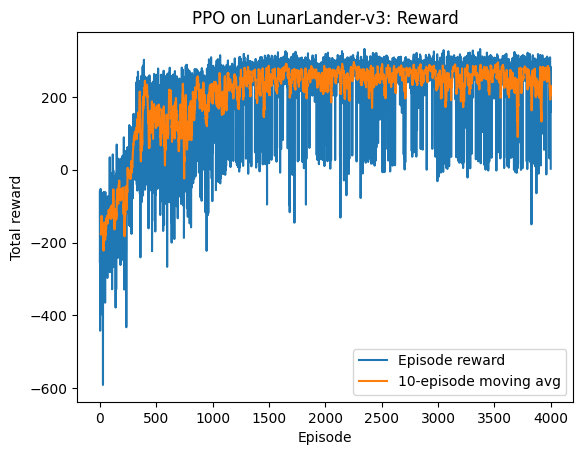

In [ ]:
# Cell for plotting the episode rewards and their moving average
import matplotlib.pyplot as plt
import numpy as np

rewards = np.array(episode_rewards)
window = 10
moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')

plt.figure()
plt.plot(rewards, label="Episode reward")
plt.plot(np.arange(window-1, len(rewards)), moving_avg, label="10-episode moving avg")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.legend()
plt.title("PPO on LunarLander-v3: Reward")
plt.show()

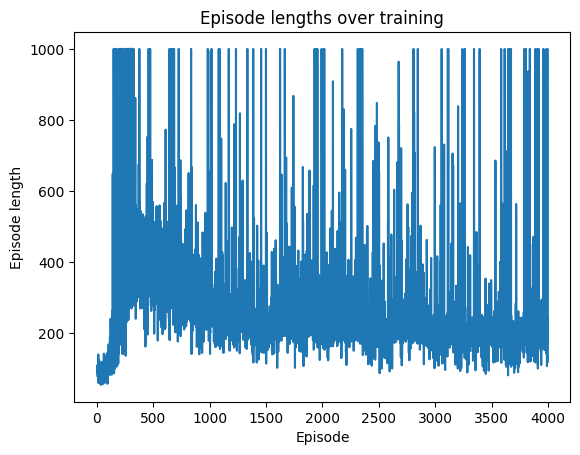

In [ ]:
# Cell for plotting the episode lengths over training
plt.figure()
plt.plot(episode_lengths)
plt.xlabel("Episode")
plt.ylabel("Episode length")
plt.title("Episode lengths over training")
plt.show()

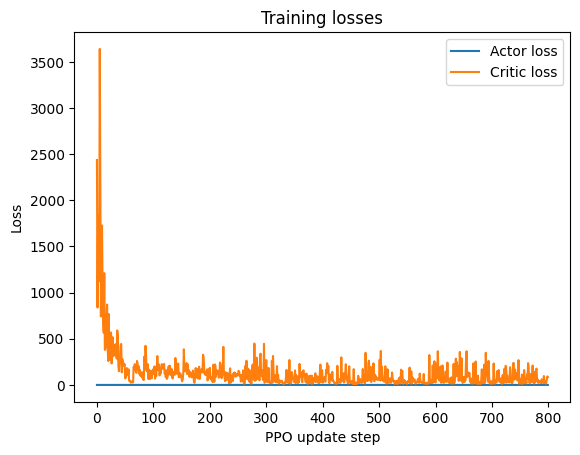

In [ ]:
# Cell for plotting the actor and critic training losses
plt.figure()
plt.plot(actor_losses, label="Actor loss")
plt.plot(critic_losses, label="Critic loss")
plt.xlabel("PPO update step")
plt.ylabel("Loss")
plt.legend()
plt.title("Training losses")
plt.show()

## Visualise Rover Landing

In [ ]:
# initializing a visualization environment and setting actor to evaluation mode
import gymnasium as gym
vis_env = gym.make("LunarLander-v3", render_mode="rgb_array")
actor.eval()   # using trained model

Actor(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [ ]:
# Function to run an episode and collect frames for visualization

import torch
import matplotlib.pyplot as plt

def run_episode_and_collect_frames():
    state, _ = vis_env.reset()
    done = False
    frames = []

    while not done:
        state_t = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

        with torch.no_grad():
            logits = actor(state_t)
            action = torch.argmax(logits, dim=-1).item()

        state, reward, terminated, truncated, _ = vis_env.step(action)
        frame = vis_env.render()
        frames.append(frame)
        done = terminated or truncated

    return frames

In [ ]:
# Downloading the generated video file

frames = run_episode_and_collect_frames()

from google.colab import files
files.download('/content/lunarlander.mp4')


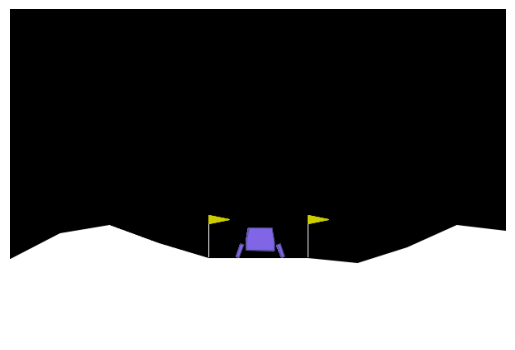

In [ ]:
# Displaying the last frame of the collected video frames

plt.imshow(frames[-1])
plt.axis("off")
plt.show()

#III. Analysis of "The Bitter Lesson" essay by Richard Sutton and a rebuttal by Max Welling [10 Points]

Machine learning as a field has a history of healthy debates. One recent essay written by Turing Awardee Richard Sutton called "The Bitter Lesson" has been center of one such debate on the role of data, knowledge and scale in Machine Learning and AI.

**Exercise 4**:  In this exercise, your goal is to read and analyze the Bitter Lesson essay ([Sutton's essay Link here](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)) and a rebuttal by Max Welling titled 'Do we still need models or just more data and compute?' ([Welling's essay Link here](https://drive.google.com/file/d/1SutrpX67vSmfwp3vegBCYmDPtRz3AuLV/view?usp=sharing)). Max Welling is co-inventor of VAEs, GNNs, and Equivariant networks among many other things. Write the answers to following questions:

**4.1** In 2–3 sentences, state what Sutton means by the ‘bitter lesson’ in AI and ML.

**4.2** Name one historical example Sutton gives and explain how it illustrates his argument. Can you think of a potential weakness in this example where the argument breaks?

**4.3** Summarize in 3-4 lines Welling's arguments and on what points he agrees and disagrees with Sutton?

**4.4** After reading both essays, where do you personally stand and whose arguments you prefer and why? Please feel free to add an example from your prior experience in using machine learning for projects/work.

ANS 4.1

Sutton’s “bitter lesson” is that, across AI research, approaches that rely on general, computation-heavy methods consistently outperform. Although researchers often try to embed expert insights, the long-term winners tend to be simpler methods that scale with increasing computation. The “bitter” part is that this means human knowledge matter less than computations for models.

ANS 4.2

A historical example Sutton gives is computer chess, where researchers used human-like chess knowledge to build a model, but the system that finally defeated the world champion won by relying mostly on massive search and computation rather than human strategic insight. This supports Sutton’s argument that scalable, computation-heavy approaches ultimately outperform human knowledge based ones.

A potential weakness in this example is that Deep Blue succeeded partly because chess is a narrow, well-defined problem with an enormous amount of available data and a finite action space, which makes brute-force search feasible. As the article from Welling highlights, this kind of success may not generalize to open-ended, data-poor, real-world tasks, where extrapolation and domain knowledge still play a crucial role.

ANS 4.3

Welling agrees with Sutton that scalable computation and deep learning have driven many of the major breakthroughs in AI, especially in narrow, well-defined domains like chess, Go, vision, and speech recognition. However, he argues that Sutton underestimates the crucial role of data availability, these successes work largely because the problems allow abundant or easily generated data. Welling disagrees with the idea that we can forget about modeling the world, insisting that real-world tasks requiring extrapolation, such as self-driving, must incorporate human knowledge, structure, or generative models. He concludes that while compute and learning scale well, true general intelligence will still require model-based reasoning in addition to raw computation.


ANS 4.4

After reading both essays, I find myself aligned with Welling's position more than Sutton. I agree with Sutton that scalable, computation-driven methods have consistently produced major breakthroughs, and my own ML work has shown that large models often outperform carefully engineered features. However, I also strongly agree with Welling that these successes depend on having abundant, well-structured data, and that many real-world problems require extrapolation, causality, and some form of world modeling that pure deep learning cannot yet provide.

For example, in one of my previous projects on house-price prediction, purely data-driven models like gradient boosting performed extremely well when training data covered the entire distribution, but the model consistently failed on rare or atypical houses, properties in rural areas or with unusual architectural styles, because it had no prior structure to guide extrapolation. This mirrors Welling’s argument that data-driven methods excel at interpolation, but human-designed modeling or domain knowledge becomes essential when stepping outside the data manifold.

Overall, I prefer Welling’s more balanced perspective: compute-scaling matters, but general intelligence will require combining scalable learning with explicit models of how the world works.